# Discover NLP with Python: Session #3 - Word Vectorization

Code implementation for below topics:


1.   TF-IDF
2.   Bag-of-Words











Dataset Link: https://www.kaggle.com/snapcrack/all-the-news

Dataset Name: articles1.csv (50,000 news articles)

Dataset Description: News articles from 5 American publications

**Steps to access, download, and use the dataset:**



1.   Access the above link to kaggle, click on "Data" tab and download "articles1.csv(194.11 MB)" the dataset
2.   Once downloaded, click on the file to unzip it. 
3.   Save the file in a folder easily accessible - E.g. "Documents"
4.   Open a Google Colab Notebook
5.   In the left pane of the Google Colab, click on "Files" and select the upload icon (Icon hover text: "Upload to session storage")
6.   You are ready to start using the data in the Colab Notebook.



Data location within Colab: '/content/articles1.csv'

Check whick folder in the Google Colab notebook we are currently in?

In [ ]:
pwd

'/content'

Now that we know which folder we are in, how do we see if the data we loaded (in step 5 above) is correctly loaded or not?

In [ ]:
ls

'articles1 2.csv'   articles1.csv   articles1_edited.csv   sample_data/




---



---



## Load dataset, Exploratory Data Analysis, and Pre-Processing

### Load .csv dataset into a pandas dataframe

In [ ]:
# reading the csv into a pandas dataframe
import pandas as pd
import csv

cols=['num','id','title','publication', 'author', 'date', 'year', 'month', 'url', 'content']

news_articles_df = pd.read_csv('/content/articles1_edited.csv', engine = 'python', usecols=cols, header=0, nrows=10000)
news_articles_df = news_articles_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

news_articles_df.columns=['num','id','title','publication', 'author', 'date', 'year', 'month', 'url', 'content']

nRow, nCol = news_articles_df.shape
print(f'There are {nRow} rows and {nCol} columns')

# Removing empty rows from csv 
news_articles_df.dropna(axis=0, how='all',inplace=True)
nRow, nCol = news_articles_df.shape
print(f'There are {nRow} rows and {nCol} columns after removing empty rows')

news_articles_df.head()

There are 10000 rows and 10 columns
There are 10000 rows and 10 columns after removing empty rows


,num,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


##### Removing the bad lines by checking in the column 'num' (which is just a serial number is type int or not, if not then assuming it's a bad link and removing it from df)

In [ ]:
news_articles_df = news_articles_df[pd.to_numeric(news_articles_df['num'], errors='coerce').notnull()]

nRow, nCol = news_articles_df.shape
print(f'There are {nRow} rows and {nCol} columns')

news_articles_df.head()

There are 10000 rows and 10 columns


,num,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


### Describe the data

In [ ]:
#@title
# getting basic info about the dataset

news_articles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num          10000 non-null  int64  
 1   id           10000 non-null  int64  
 2   title        10000 non-null  object 
 3   publication  10000 non-null  object 
 4   author       9964 non-null   object 
 5   date         10000 non-null  object 
 6   year         10000 non-null  float64
 7   month        10000 non-null  float64
 8   url          0 non-null      float64
 9   content      10000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 859.4+ KB


In [ ]:
#@title
# checking for null values, if any

news_articles_df.isnull().sum()

num                0
id                 0
title              0
publication        0
author            36
date               0
year               0
month              0
url            10000
content            0
dtype: int64

### EDA of the dataset

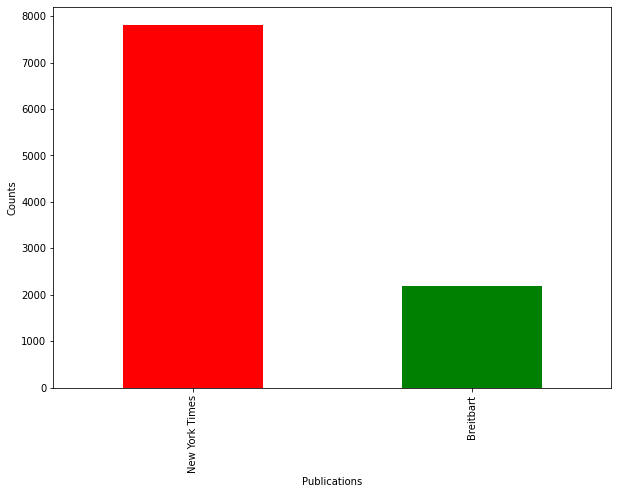

In [ ]:
# Visualization of news publications names and article count in the dataset

import matplotlib.pyplot as plt

color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,7))

plt.xlabel("Publications")
plt.ylabel("Counts")

news_articles_df.publication.value_counts().plot(kind='bar', color=color_list)

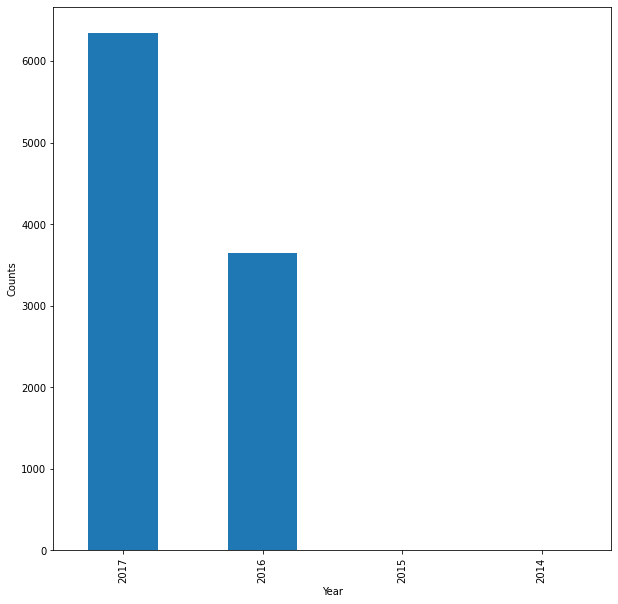

In [ ]:
# Visualization of news article count per year

news_articles_df['year'] = news_articles_df['year'].map(int).map(str)
news_articles_df['year'] = pd.to_datetime(news_articles_df['year'], format='%Y').dt.strftime('%Y')
news_articles_df = news_articles_df.sort_values(by='year')

plt.figure(figsize=(10,10))
plt.xlabel("Year")
plt.ylabel("Counts")

news_articles_df.year.value_counts().plot(kind='bar')
plt.show()

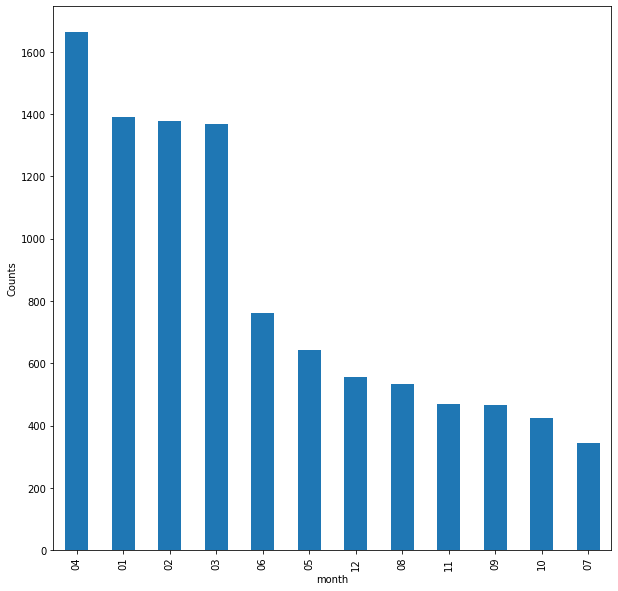

In [ ]:
# Visualization of news article count released monthly to observe if any pattern exists 

news_articles_df['month'] = news_articles_df['month'].map(int).map(str)
news_articles_df['month'] = pd.to_datetime(news_articles_df['month'], format='%m').dt.strftime('%m')
news_articles_df = news_articles_df.sort_values(by='month')

plt.figure(figsize=(10,10))
plt.xlabel("month")
plt.ylabel("Counts")

news_articles_df.month.value_counts().plot(kind='bar')
plt.show()

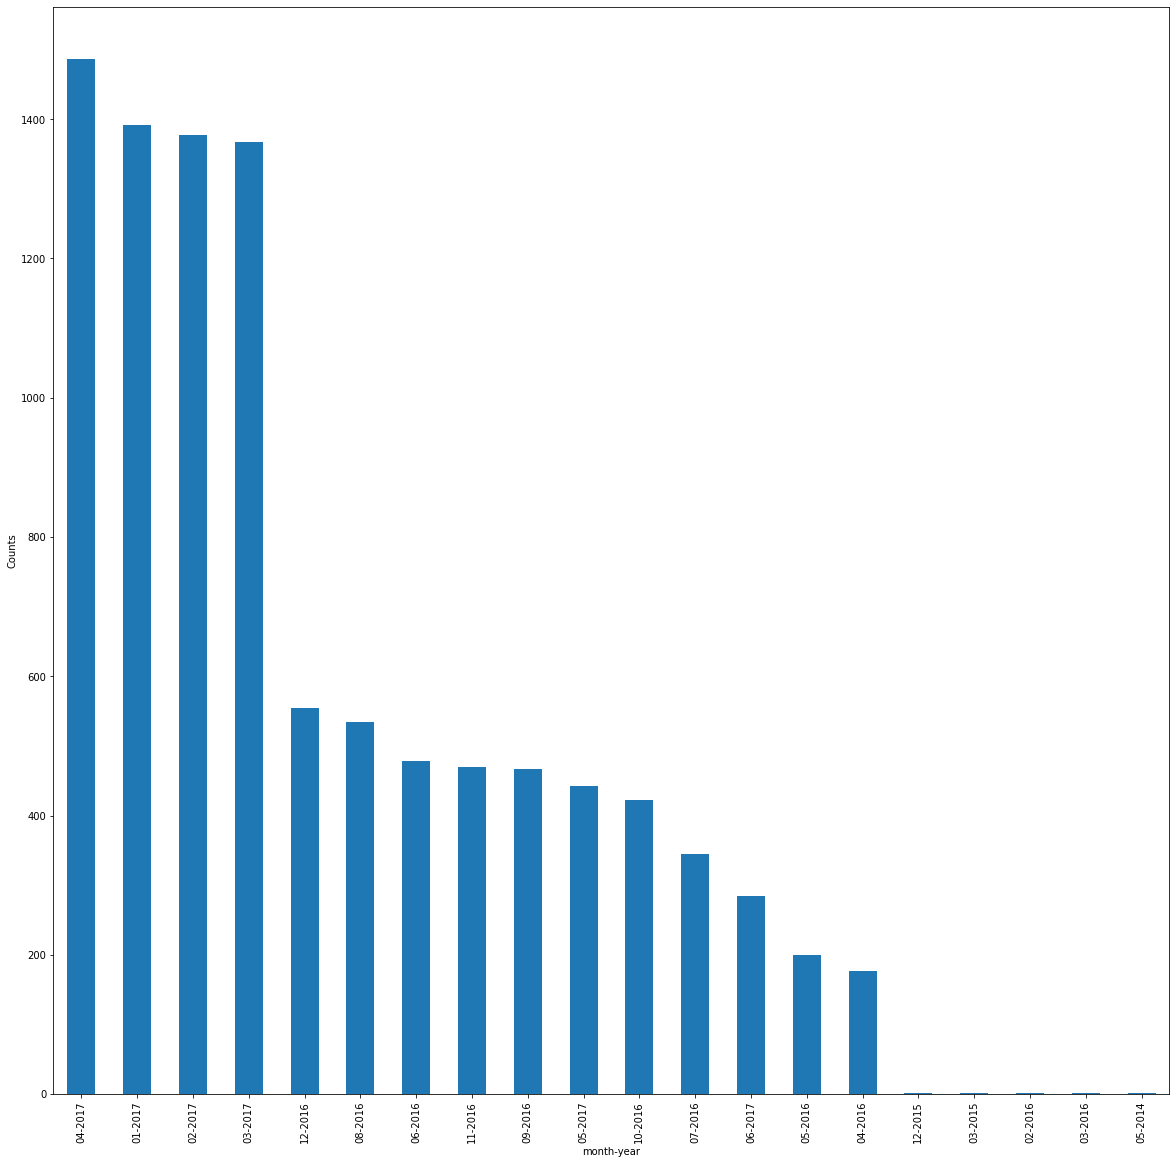

In [ ]:
# Visualization of news article count per month-year

news_articles_df['my'] = news_articles_df['month'].map(int).map(str) + '-' + news_articles_df['year'].map(int).map(str)
news_articles_df['my'] = pd.to_datetime(news_articles_df['my'], format='%m-%Y').dt.strftime('%m-%Y')
news_articles_df = news_articles_df.sort_values(by='my')

plt.figure(figsize=(20,20))
plt.xlabel("month-year")
plt.ylabel("Counts")

news_articles_df.my.value_counts().plot(kind='bar')
plt.show()

### For next phase of analysis, we will consider only the "Content" column

In [ ]:
# initializing a new dataframe with only the content column for faster operation 

content_df = news_articles_df['content']
content_df = content_df.to_frame()
content_df
#content_df.sample(10, random_state = 5)

,content
212,(Want to get this briefing by email? Here’s th...
455,ROME — As night fell in Italy’s Apennine Mo...
433,In the latest twist in a legal issue that has ...
456,WASHINGTON — Two United States Air Force ...
432,"DAKAR, Senegal — The number of people kille..."
...,...
6482,The first burglar heaved a large rock or pavin...
6475,"George Michael, the pop superstar and icon of..."
6468,JERUSALEM — In a furious riposte a day afte...
6449,A key component of New York City’s inclusive a...


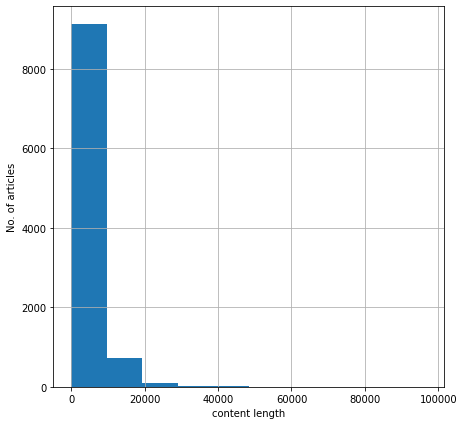

In [ ]:
# visualizing content length
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.xlabel("content length")
plt.ylabel("No. of articles")

content_df['content'].str.len().hist()

### Parts of Speech (POS) Tagging

#### Import libraries

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Contraction Mapping

!pip install contractions
import contractions

     |████████████████████████████████| 245kB 4.1MB/s 
     |████████████████████████████████| 317kB 20.9MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81694 sha256=c726b597e2032b26d631b17177a15f748fbe57b8dc2ef4b4680fb92fa17e504d
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


#### Expand Contractions

In [ ]:
content_df['content'] = content_df['content'].apply(lambda x: [contractions.fix(word) for word in x.split()])
content_df.sample(10, random_state = 5)
#content_df.head()

,content
9323,"[ERIN,, Wis., —, Benign, conditions, at, Erin,..."
690,"[Surrounded, by, her, five, grandchildren, who..."
6005,"[MADRID, —, For, the, past, 288, days,, Spain,..."
921,"[(Want, to, get, this, briefing, by, email?, H..."
4237,"[CHICAGO, —, “There, is, no, curse, that is, c..."
7915,"[After, comedian, Kathy, Griffin, posed, with,..."
3919,"[Gov., Mike, Pence, of, Indiana, has, so, far,..."
2422,"[Midway, through, a, lackluster, freshman, yea..."
3713,"[KABUL,, Afghanistan, —, A, United, States, so..."
5518,"[WASHINGTON, —, Representative, Kevin, McCarth..."


In [ ]:
#joining back the list of items into one string

content_df['content'] = [' '.join(map(str, l)) for l in content_df['content']]
content_df.sample(10, random_state = 5)

,content
9323,"ERIN, Wis. — Benign conditions at Erin Hills m..."
690,Surrounded by her five grandchildren who live ...
6005,"MADRID — For the past 288 days, Spain has plod..."
921,(Want to get this briefing by email? Here’s th...
4237,CHICAGO — “There is no curse that is crazy tal...
7915,After comedian Kathy Griffin posed with a blud...
3919,Gov. Mike Pence of Indiana has so far played t...
2422,Midway through a lackluster freshman year at t...
3713,"KABUL, Afghanistan — A United States soldier w..."
5518,"WASHINGTON — Representative Kevin McCarthy, th..."


In [ ]:
# you can explore individual cells like this

print(content_df['content'][0])
print(type(content_df['content'][0]))

WASHINGTON — Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for and Americans, handing House Republicans a big victory on issues. But a sudden loss of the disputed subsidies could conceivably because the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering conservative voters who have been demanding an

#### Noise Cleaning

In [ ]:
# Noise Cleaning - spacing, special characters, lowercasing 

import regex as re
content_df['content'] = content_df['content'].str.lower()
content_df['content'] = content_df['content'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

content_df.sample(10, random_state = 5)

,content
9323,erin wis benign conditions at erin hills made...
690,surrounded by her five grandchildren who live ...
6005,madrid for the past 288 days spain has plodde...
921,want to get this briefing by email heres the ...
4237,chicago there is no curse that is crazy talk ...
7915,after comedian kathy griffin posed with a blud...
3919,gov mike pence of indiana has so far played th...
2422,midway through a lackluster freshman year at t...
3713,kabul afghanistan a united states soldier was...
5518,washington representative kevin mccarthy the ...


Regex explanation: 

1.   [^] matches everything but everything inside the blockquotes
2.   \w matches any word character (equal to [a-zA-Z0-9_])
3.   \d matches a digit (equal to [0-9])
4.   \s matches any whitespace character (equal to [\r\n\t\f\v ])
5.   \' matches the character ' literally (case sensitive)
6.   '+' matches between one and unlimited times, as many times as possible, giving back as needed

In [ ]:
#nltk tokenization

content_df['tokenized_content'] = content_df['content'].apply(word_tokenize)
content_df.sample(10, random_state = 5)

,content,tokenized_content
9323,erin wis benign conditions at erin hills made...,"[erin, wis, benign, conditions, at, erin, hill..."
690,surrounded by her five grandchildren who live ...,"[surrounded, by, her, five, grandchildren, who..."
6005,madrid for the past 288 days spain has plodde...,"[madrid, for, the, past, 288, days, spain, has..."
921,want to get this briefing by email heres the ...,"[want, to, get, this, briefing, by, email, her..."
4237,chicago there is no curse that is crazy talk ...,"[chicago, there, is, no, curse, that, is, craz..."
7915,after comedian kathy griffin posed with a blud...,"[after, comedian, kathy, griffin, posed, with,..."
3919,gov mike pence of indiana has so far played th...,"[gov, mike, pence, of, indiana, has, so, far, ..."
2422,midway through a lackluster freshman year at t...,"[midway, through, a, lackluster, freshman, yea..."
3713,kabul afghanistan a united states soldier was...,"[kabul, afghanistan, a, united, states, soldie..."
5518,washington representative kevin mccarthy the ...,"[washington, representative, kevin, mccarthy, ..."


In [ ]:
# initializing Stop words libraries

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Visualizations

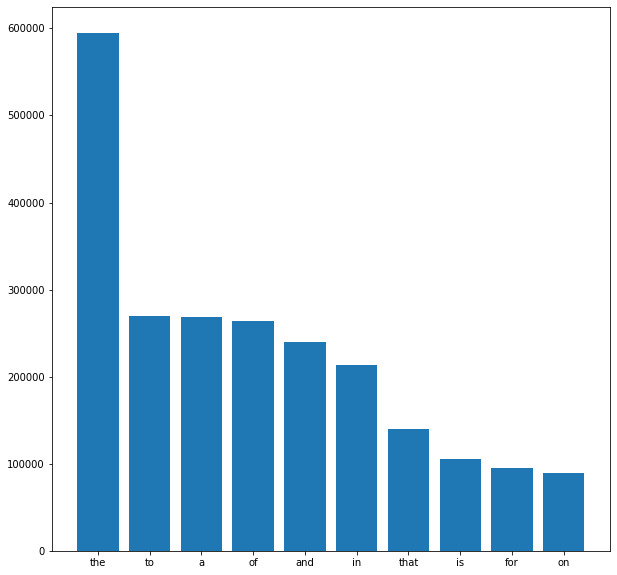

In [ ]:
# Before removing checking occurances of stopwords in article content


def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

plot_top_stopwords_barchart(content_df['content'])

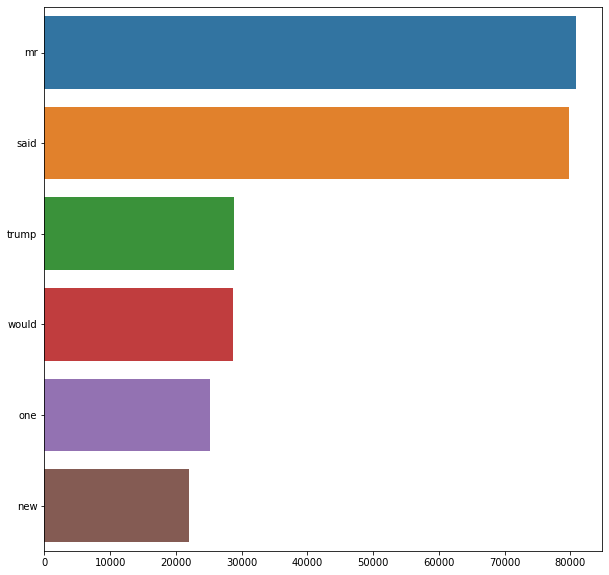

In [ ]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(content_df['content'])

# Explore more such analysis here - https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

#### Remove stopwords

In [ ]:
# Now we remove stopwords 

content_df['tokenized_content'] = content_df['tokenized_content'].apply(lambda x: [word for word in x if word not in stop_words])
content_df['tokenized_content_join'] = [' '.join(map(str, l)) for l in content_df['tokenized_content']]

content_df.sample(10, random_state = 5)

,content,tokenized_content,tokenized_content_join
9323,erin wis benign conditions at erin hills made...,"[erin, wis, benign, conditions, erin, hills, m...",erin wis benign conditions erin hills made sco...
690,surrounded by her five grandchildren who live ...,"[surrounded, five, grandchildren, live, sandra...",surrounded five grandchildren live sandra park...
6005,madrid for the past 288 days spain has plodde...,"[madrid, past, 288, days, spain, plodded, alon...",madrid past 288 days spain plodded along witho...
921,want to get this briefing by email heres the ...,"[want, get, briefing, email, heres, good, even...",want get briefing email heres good evening her...
4237,chicago there is no curse that is crazy talk ...,"[chicago, curse, crazy, talk, chairman, chicag...",chicago curse crazy talk chairman chicago cubs...
7915,after comedian kathy griffin posed with a blud...,"[comedian, kathy, griffin, posed, bludgeoned, ...",comedian kathy griffin posed bludgeoned severe...
3919,gov mike pence of indiana has so far played th...,"[gov, mike, pence, indiana, far, played, role,...",gov mike pence indiana far played role donald ...
2422,midway through a lackluster freshman year at t...,"[midway, lackluster, freshman, year, universit...",midway lackluster freshman year university san...
3713,kabul afghanistan a united states soldier was...,"[kabul, afghanistan, united, states, soldier, ...",kabul afghanistan united states soldier killed...
5518,washington representative kevin mccarthy the ...,"[washington, representative, kevin, mccarthy, ...",washington representative kevin mccarthy house...


In [ ]:
# for sake of simplicity, showing 10 article contents based on the same seed value at 5
tagged_stanzas = []
tagged = []

for word in content_df['tokenized_content'].sample(10, random_state = 5):
  tagged_word = nltk.pos_tag(word)
  print(tagged_word)

  tagged_stanzas.append(tagged_word)

# This format is needed for below visualizer as in takes only two values. If you skip this format, it might give you - "too many values to unpack error" 
tagged.append(tagged_stanzas)

[('erin', 'NN'), ('wis', 'WRB'), ('benign', 'JJ'), ('conditions', 'NNS'), ('erin', 'VBP'), ('hills', 'NNS'), ('made', 'VBN'), ('scoring', 'VBG'), ('fest', 'JJS'), ('crowded', 'VBN'), ('leaderboard', 'NN'), ('guarantees', 'NNS'), ('exciting', 'VBG'), ('weekend', 'NN'), ('open', 'JJ'), ('little', 'JJ'), ('wind', 'NN'), ('rain', 'NN'), ('greens', 'NNS'), ('fox', 'JJ'), ('sports', 'NNS'), ('analyst', 'NN'), ('paul', 'NN'), ('azinger', 'NN'), ('called', 'VBN'), ('best', 'RB'), ('ever', 'RB'), ('seen', 'VBN'), ('worlds', 'NNS'), ('best', 'JJS'), ('golfers', 'NNS'), ('tore', 'VBP'), ('course', 'NN'), ('leading', 'VBG'), ('lowest', 'JJS'), ('cut', 'NN'), ('line', 'NN'), ('open', 'JJ'), ('history', 'NN'), ('1', 'CD'), ('bunched', 'VBN'), ('leaderboard', 'NN'), ('consists', 'VBZ'), ('four', 'CD'), ('players', 'NNS'), ('tied', 'VBD'), ('top', 'JJ'), ('englishman', 'NN'), ('paul', 'NN'), ('casey', 'NN'), ('tommy', 'NN'), ('fleetwood', 'NN'), ('americans', 'NNS'), ('brian', 'JJ'), ('harman', 'NN'),

## TF-IDF

### **Reminder: TF-IDF stands for “Term Frequency — Inverse Data Frequency”.** 

- Term Frequency (TF): gives us the frequency of the word in each document in the corpus. It is the ratio of number of times the word appears in a document compared to the total number of words in that document. It increases as the number of occurrences of that word within the document increases. Each document has its own tf. 

![TF](https://cdn-media-1.freecodecamp.org/images/1*HM0Vcdrx2RApOyjp_ZeW_Q.png)


- Inverse Data Frequency (idf): used to calculate the weight of rare words across all documents in the corpus. The words that occur rarely in the corpus have a high IDF score. It is given by the equation below. 

![IDF](https://cdn-media-1.freecodecamp.org/images/1*A5YGwFpcTd0YTCdgoiHFUw.png)

Combining these two we come up with the TF-IDF score (w) for a word in a document in the corpus. It is the product of tf and idf: 

![TF-IDF formula](https://cdn-media-1.freecodecamp.org/images/1*nSqHXwOIJ2fa_EFLTh5KYw.png)

![formula](https://cdn-media-1.freecodecamp.org/images/1*q2tRgjV_J-MLvnhwNAl0KQ.png)

#### Let's automate this calculation process and utilize sklearn's built-in capabilities to calculate TF-IDF.

Refer to documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

Let's first take 5 random articles and obtain the matrix of TF-IDF features.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [ ]:
# tfidf calculation
text_content = content_df['tokenized_content_join']
vector = TfidfVectorizer(max_df=0.3,         # drop words that occur in more than X percent of documents
                             #min_df=8,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case 
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )

In [ ]:
content_subset = text_content[0:10]
tfidf_subset = vector.fit_transform(content_subset)

In [ ]:
tfidf_subset = tfidf_subset.toarray()

vocab = vector.get_feature_names()
tfidf_df = pd.DataFrame(np.round(tfidf_subset, 2), columns=vocab)
tfidf_df

,05,10,100,105,10th,120,13,130,135,16,165,17,18,19,1939,1962,1970s,1976,1979,1980,1985,1989,1992,1998,20,200,2009,2011,2012,2014,2015,2016,2017,2018,21,24,25,27,270,28,...,whirlwind,white,whiteman,wife,wild,willful,williams,wilmington,winer,wiped,wise,witnesses,woman,women,word,words,wore,worked,worker,workers,working,workouts,works,world,worldwide,worth,wrap,written,wrong,wrongdoing,wrote,yaa,yard,yasin,yesterdays,york,youtube,zara,zones,zoos
0,0.00,0.03,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,...,0.04,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00
1,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.02,0.00,0.05,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00
2,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.04,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,...,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.04,0.00,0.04,0.00,0.00,0.00,0.04,0.00,0.00
5,0.04,0.00,0.00,0.00,0.03,0.00,0.00,0.08,0.04,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.12,0.08,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.00,0.00,0.00,0.00,0.00,0.23,0.02,0.02,0.03,0.03,0.02,0.03,0.0

In [ ]:
tfidf_subset.shape

(10, 2045)

In [ ]:
print(vocab)

['05', '10', '100', '105', '10th', '120', '13', '130', '135', '16', '165', '17', '18', '19', '1939', '1962', '1970s', '1976', '1979', '1980', '1985', '1989', '1992', '1998', '20', '200', '2009', '2011', '2012', '2014', '2015', '2016', '2017', '2018', '21', '24', '25', '27', '270', '28', '30', '300', '31', '34', '35', '43', '44', '46', '47', '495', '50', '500', '54', '56', '59', '64', '67', '70', '75', '750', '80', '90', '93', '_____', 'abandoned', 'abducted', 'abduction', 'abductor', 'abiding', 'ability', 'able', 'abroad', 'absolutely', 'abuse', 'accelerates', 'accept', 'accidental', 'accidentally', 'accord', 'account', 'accusations', 'acknowledge', 'acknowledged', 'acknowledging', 'act', 'actions', 'activated', 'activist', 'activity', 'actually', 'add', 'added', 'adding', 'addition', 'additions', 'address', 'adequate', 'administration', 'administrations', 'admits', 'admitting', 'adult', 'advance', 'advances', 'advisers', 'advisory', 'aerial', 'affected', 'africa', 'afternoon', 'afters



---



---



## Bag-of-Words

![bow](http://uc-r.github.io/public/images/analytics/feature-engineering/bow-image.png)

Let's first take 5 news articles.

In [ ]:
content_df_random = content_df['tokenized_content_join'].sample(5)
content_df_random

4282    paul elio innovative engineer behind commercia...
6658    traveling five years nearly 1 8 billion miles ...
157     wealth influence technology business always ga...
7941    tucson arizona sinaloa smugglers migrants grow...
1246    stunning act terror assault world trade center...
Name: tokenized_content_join, dtype: object

In [ ]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_bow = CountVectorizer()

In [ ]:
corpus_bow = content_df_random
X_bow = vectorizer_bow.fit_transform(corpus_bow)

In [ ]:
print(vectorizer_bow.get_feature_names())

['000', '10', '100', '11', '1153', '12', '128', '15', '17', '18', '1990s', '1993', '1995', '20', '200', '2005', '2012', '2013', '2014', '2017', '22', '26', '30', '300', '365', '37', '467', '48', '500', '55', '57th', '65th', '698', '70', '78', '84', '93', 'abdel', 'able', 'academics', 'accelerate', 'according', 'accurately', 'acquired', 'acquisition', 'acquisitions', 'across', 'act', 'actually', 'ad', 'add', 'added', 'adding', 'adjunct', 'administration', 'adopt', 'ads', 'advances', 'advantage', 'advertisers', 'advertising', 'advises', 'afforded', 'afternoon', 'afterward', 'agency', 'agent', 'agents', 'aggression', 'aggressive', 'ago', 'ahead', 'al', 'albeit', 'alert', 'algorithms', 'alienating', 'aliens', 'allow', 'almost', 'along', 'alpha', 'already', 'also', 'although', 'aluminum', 'always', 'amazon', 'ambition', 'american', 'americans', 'among', 'amounts', 'analysis', 'andrew', 'andrews', 'annabelle', 'announce', 'anonymous', 'another', 'answering', 'antenna', 'anthony', 'antitrust'

In [ ]:
print(X_bow.shape)

(5, 1604)


In [ ]:
print(X_bow.toarray())

[[1 1 0 ... 1 0 0]
 [1 0 2 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]]


In [ ]:
doc_term_matrix = X_bow.todense()
doc_term_matrix

matrix([[1, 1, 0, ..., 1, 0, 0],
        [1, 0, 2, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 1, 0]])

Now let's repeat this analysis but with a larger subset of the data.

In [ ]:
content_df_subset = content_df['tokenized_content_join']
content_df_subset[0:100]
content_df_subset.head()

212    want get briefing email heres good evening her...
455    rome night fell italys apennine mountains thur...
433    latest twist legal issue galvanized musicians ...
456    washington two united states air force bombers...
432    dakar senegal number people killed accidental ...
Name: tokenized_content_join, dtype: object

In [ ]:
corpus_bow_subset = content_df_subset
X_bow_subset = vectorizer_bow.fit_transform(corpus_bow_subset)

In [ ]:
print(vectorizer_bow.get_feature_names())

['00', '000', '0000', '0000364334', '0001', '0002', '0009', '000s', '000th', '001', '0012', '0015', '002', '0024', '0025', '003', '004', '0045', '005', '006', '007', '007s', '01', '010', '0100', '0102', '0115', '012', '0125', '0134', '014', '015', '017', '018', '02', '020', '0200', '0200gmt', '021', '0214', '022', '0230', '024', '025', '0250', '026', '027', '028', '03', '030', '0305', '031', '032', '034', '0345', '036', '038', '039', '04', '040', '0400', '0415hrs', '042', '043', '045', '046', '049', '05', '050', '050th', '051', '053', '054', '055', '056', '057', '058', '06', '060', '061', '063', '064', '065', '066', '067', '068', '07', '070', '071', '072', '074', '075', '077', '078', '08', '0800', '081', '082', '083', '085', '087', '089', '09', '090', '091', '0915', '0920', '093', '0935', '095', '0950', '097', '098', '0n', '0s', '10', '100', '1000', '1000000', '1000s', '1001', '1002', '1003', '1004', '1005', '1007', '10086', '10087', '100c', '100g', '100k', '100s', '100th', '100x', '10

In [ ]:
print(X_bow_subset.shape)

(10000, 107294)


In [ ]:
print(X_bow_subset.toarray())

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [ ]:
vectorizer_bow_subset_2 = CountVectorizer(analyzer='word', ngram_range=(2,2))
X_bow_subset_2 = vectorizer_bow_subset_2.fit_transform(corpus_bow_subset)

In [ ]:
print(vectorizer_bow_subset_2.get_feature_names())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(X_bow_subset_2.toarray())



---



---



## References & Further Reading:

1.   https://towardsdatascience.com/understanding-feature-engineering-part-3-traditional-methods-for-text-data-f6f7d70acd41
2.   https://machinelearningmastery.com/gentle-introduction-bag-words-model/
3.   https://www.geeksforgeeks.org/feature-extraction-techniques-nlp/
4.   https://towardsdatascience.com/3-basic-distance-measurement-in-text-mining-5852becff1d7
5.   https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089





---



---

